In [10]:
print("This is my first code")

This is my first code


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [12]:
data=pd.read_csv(r"C:\Users\Public\Data.csv")

In [13]:
data.head()

,id,age,disease,ailments,eligibility
0,1,25,10,4,0
1,2,17,10,4,0
2,3,30,0,0,1
3,4,15,0,0,0
4,5,45,0,0,1


In [14]:
data_original=data.copy()

In [15]:
data.columns

Index(['id', 'age', 'disease', 'ailments', 'eligibility'], dtype='object')

In [16]:
data.dtypes

id             int64
age            int64
disease        int64
ailments       int64
eligibility    int64
dtype: object

In [17]:
data.shape

(200, 5)

In [18]:
data['eligibility'].value_counts()

0    120
1     80
Name: eligibility, dtype: int64

In [19]:
data['eligibility'].value_counts(normalize=True)


0    0.6
1    0.4
Name: eligibility, dtype: float64

<AxesSubplot:>

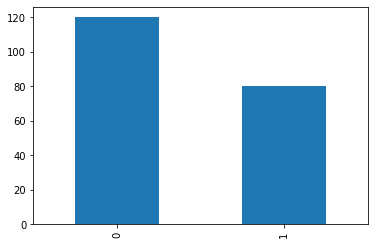

In [20]:
data['eligibility'].value_counts().plot.bar()

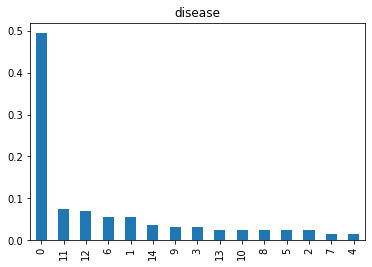

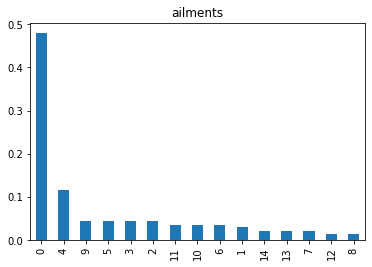

In [21]:
data['disease'].value_counts(normalize=True).plot.bar(title='disease')
plt.show()
data['ailments'].value_counts(normalize=True).plot.bar(title='ailments')
plt.show()

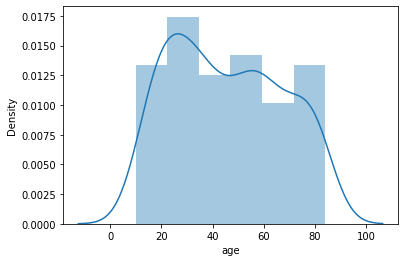

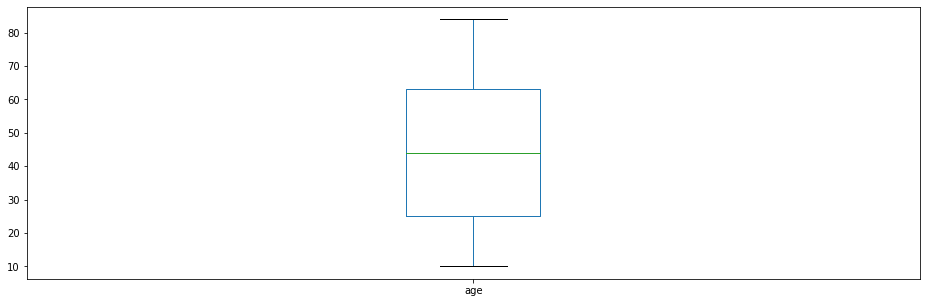

In [22]:
sns.distplot(data['age'])
plt.show()
data['age'].plot.box(figsize=(16,5))
plt.show()

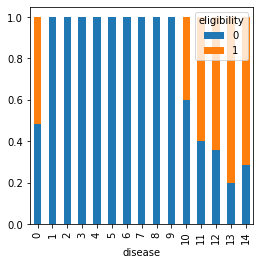

In [23]:
disease=pd.crosstab(data['disease'],data['eligibility'])
disease.div(disease.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

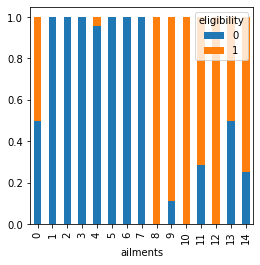

In [24]:

ailments=pd.crosstab(data['ailments'],data['eligibility'])
ailments.div(ailments.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


<AxesSubplot:xlabel='eligibility'>

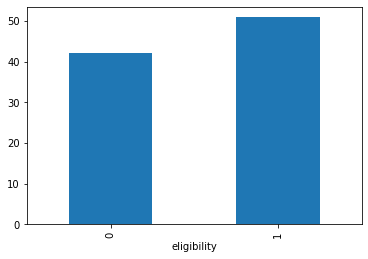

In [25]:
data.groupby('eligibility')['age'].mean().plot.bar()

<AxesSubplot:>

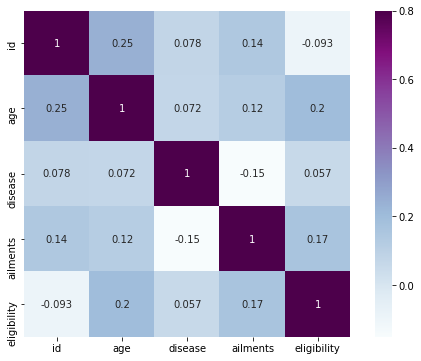

In [26]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [27]:
data.isnull().sum()

id             0
age            0
disease        0
ailments       0
eligibility    0
dtype: int64

In [28]:
data.isnull().sum()

id             0
age            0
disease        0
ailments       0
eligibility    0
dtype: int64

In [29]:
data.head()

,id,age,disease,ailments,eligibility
0,1,25,10,4,0
1,2,17,10,4,0
2,3,30,0,0,1
3,4,15,0,0,0
4,5,45,0,0,1


<AxesSubplot:>

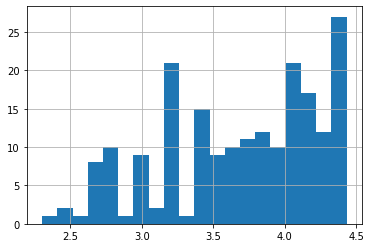

In [30]:
data['age_log']=np.log(data['age'])
data['age_log'].hist(bins=20)

In [31]:
data=data.drop('id',axis=1)

In [32]:
X=data.drop('eligibility',1)
Y=data.eligibility

In [33]:
X = pd.get_dummies(X)
data=pd.get_dummies(data)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,Y,test_size=0.3)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression()

In [36]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.6166666666666667

In [37]:
from sklearn.model_selection import StratifiedKFold

In [38]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5)
for train_index,test_index in kf.split(X,Y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = Y[train_index],Y[test_index]
 model = LogisticRegression()
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.625

2 of kfold 5 
accuracy_score 0.625

3 of kfold 5 
accuracy_score 0.575

4 of kfold 5 
accuracy_score 0.6

5 of kfold 5 
accuracy_score 0.5

 Mean Validation Accuracy 0.585


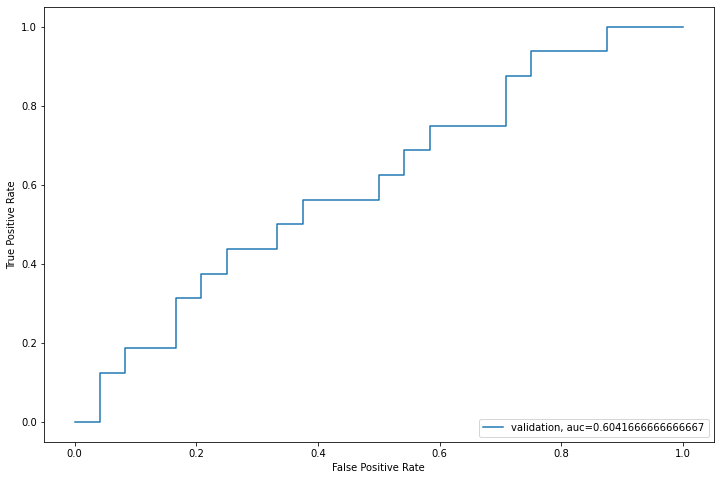

In [39]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)
GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})
grid_search.best_estimator_
RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,Y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = Y[train_index],Y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.75

2 of kfold 5 
accuracy_score 0.7

3 of kfold 5 
accuracy_score 0.725

4 of kfold 5 
accuracy_score 0.725

5 of kfold 5 
accuracy_score 0.65

 Mean Validation Accuracy 0.71


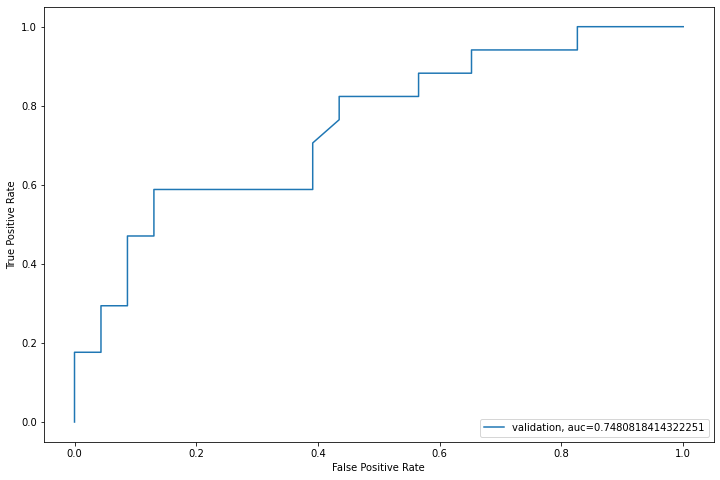

In [108]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [109]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,Y):
 xtr = X.loc[train_index]
 ytr = Y[train_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)

 

In [110]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(ytr, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [160, 40]

In [74]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,Y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = Y[train_index],Y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.85

2 of kfold 5 
accuracy_score 0.725

3 of kfold 5 
accuracy_score 0.8

4 of kfold 5 
accuracy_score 0.8

5 of kfold 5 
accuracy_score 0.775

 Mean Validation Accuracy 0.7899999999999999


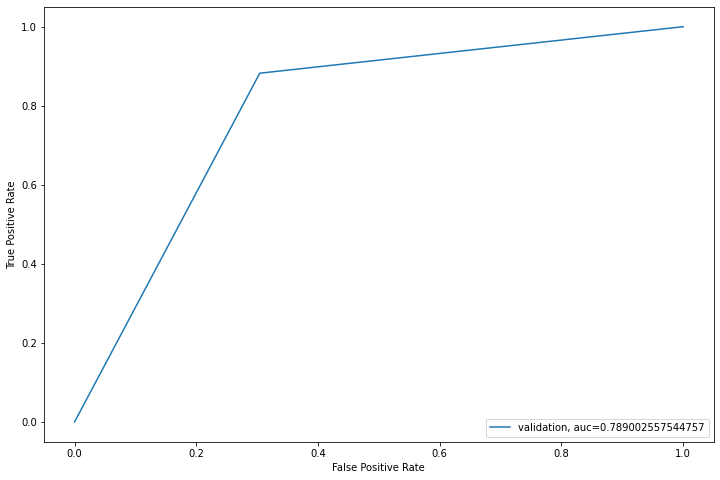

In [75]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [1]:
import pandas as pd # for data processing
import folium   #for creating maps
import requests  #for retreiving Information from URL
from geopy.geocoders import Nominatim  #converting address to cordinates
from pandas.io.json import json_normalize


CLIENT_ID = '24BAGOCQB1CBUV3RKR0DTCEBUPPGHH1MFCOT5O0SH5MSCEBH ' # replace it with your Client id
CLIENT_SECRET = 'U1SGTRHPS0L0GSQINQKKHIXCQENGSXFFA2MQFQCGHMXKXZZD' # replace it with your client secret
VERSION = '20180604'

address = input("Enter address : ")
geolocator = Nominatim(user_agent="foursquare_agent") #
#converting address to coordinates
location = geolocator.geocode(address)
if(location == None):
    print('Please enter a Valid address')
    exit()
# reading latitude from location
latitude = location.latitude
# reading longitude from location
longitude = location.longitude
# reading radius from user
radius = input("Enter the radius for searching : ")
#reading search limit from user
Limit = input("enter the Limit for Results to display : ")
url  = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, Limit)
results = requests.get(url).json()

items = results['response']['groups'][0]['items']
items[0]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#flatten JSON, Normalize JSON to Dataframe
dataframe = json_normalize(items) 

# filter columns,consider only required columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
nearby = dataframe.loc[:, filtered_columns]

# filter the category for each row
nearby['venue.categories'] = nearby.apply(get_category_type, axis=1)

# clean columns
nearby.columns = [col.split('.')[-1] for col in nearby.columns]

#replce NaN values with Not found in address
nearby['address'] = nearby['address'].fillna("Not found")
nearby.head(10)    

Please enter a Valid address


AttributeError: 'NoneType' object has no attribute 'latitude'